# LAB 1

## 1. Prepare environment

In [2]:
#!python -m pip install --upgrade pip
!python --version

Python 3.8.8


In [3]:
#!pip install numpy
#!pip install pandas
#!pip install scipy
#!pip install keras
#!pip install setuptools
#!pip install tensorflow
#!pip install tensorflow-datasets
#!pip install tensorflow-hub
#!pip install torch torchvision torchaudio

In [3]:
import scipy
import keras
import setuptools
import torch
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Dropout, MaxPooling2D, AveragePooling2D, Flatten, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print('Numpy: ' + np.__version__)
print('Pandas: ' + pd.__version__)
print('Scipy: ' + scipy.__version__)
print('Keras: ' + keras.__version__)
print('Setuptools: ' + setuptools.__version__)
print('Tensorflow: ' + tf.__version__)
print('Torch: ' + torch.__version__)

Numpy: 1.20.2
Pandas: 1.2.3
Scipy: 1.4.1
Keras: 2.7.0
Setuptools: 59.2.0
Tensorflow: 2.7.0
Torch: 1.10.0+cu113


# 2. What is Tensor ?

A tensor is a container which can house data in N dimensions, along with its linear operations, though there is nuance
in what tensors technically are and what we refer to as tensors in practice.

Mathematically speaking, tensors are more than simply a data container, however. Aside from holding numeric
data, tensors also include descriptions of the valid linear transformations between tensors. Examples of such
transformations, or relations, include the cross product and the dot product. From a computer science perspective,
it can be helpful to think of tensors as being objects in an object-oriented sense, as opposed to simply being a
data structure.

In [5]:
from IPython.display import Image
Image(url= "https://hadrienj.github.io/assets/images/2.1/scalar-vector-matrix-tensor.png")

Each tensor has some attributes:
- shape: number of elements on each axis
- rank: number of axes: scalar = 0, vector = 1, matrix = 2
- size: number of all elements of tensor

In [6]:
rank_0 = tf.constant(1)
rank_0

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [7]:
rank_1 = tf.constant([1.0, 2.0])
rank_1

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [8]:
rank_2 = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
rank_2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)>

In [9]:
rank_3 = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])
rank_3

<tf.Tensor: shape=(3, 2, 5), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])>

#### There are many ways you might visualize a tensor with more than two axes.

In [10]:
from IPython.display import Image
from IPython.display import display

x = Image(url= "https://www.tensorflow.org/guide/images/tensor/3-axis_numpy.png")
y = Image(url= "https://www.tensorflow.org/guide/images/tensor/3-axis_front.png")
z = Image(url= "https://www.tensorflow.org/guide/images/tensor/3-axis_block.png")
display(x, y, z)

You can convert a tensor to a NumPy array either using np.array or the tensor.numpy method:

In [11]:
np.array(rank_2)

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)

In [12]:
rank_2.numpy()

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)

Tensors often contain floats and ints, but have many other types, including:
- complex numbers
- strings

#### You can do basic math on tensors, including addition, element-wise multiplication, and matrix multiplication.

In [13]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]])

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [14]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [15]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105854e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


Tensors have shapes. Some vocabulary:

- Shape: The length (number of elements) of each of the axes of a tensor.
- Rank: Number of tensor axes. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.
- Axis or Dimension: A particular dimension of a tensor.
- Size: The total number of items in the tensor, the product shape vector.

In [16]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


### Manipulating Shapes

In [17]:
# Shape returns a `TensorShape` object that shows the size along each axis
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [18]:
# You can convert this object into a Python list, too
print(x.shape.as_list())

[3, 1]


You can reshape a tensor into a new shape. The tf.reshape operation is fast and cheap as the underlying data does
not need to be duplicated.

In [19]:
# You can reshape a tensor to a new shape.
# Note that you're passing in a list
reshaped = tf.reshape(x, [1, 3])
print(x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


Typically the only reasonable use of tf.reshape is to combine or split adjacent axes (or add/remove 1s).

For this 3x2x5 tensor, reshaping to (3x2)x5 or 3x(2x5) are both reasonable things to do, as the slices do not mix:

In [20]:
print(tf.reshape(rank_3, [3*2, 5]), "\n")
print(tf.reshape(rank_3, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


Reshaping will "work" for any new shape with the same total number of elements, but it will not do anything useful if you do not respect the order of the axes.

Swapping axes in tf.reshape does not work; you need tf.transpose for that.

In [21]:
# Bad examples: don't do this

# You can't reorder axes with reshape.
print(tf.reshape(rank_3, [2, 3, 5]), "\n")

# This is a mess
print(tf.reshape(rank_3, [5, 6]), "\n")

# This doesn't work at all
try:
  tf.reshape(rank_3, [7, -1])
except Exception as e:
  print(f"{type(e).__name__}: {e}")

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]], shape=(5, 6), dtype=int32) 

InvalidArgumentError: Input to reshape is a tensor with 30 values, but the requested shape requires a multiple of 7 [Op:Reshape]


## 3. Derviatives and gradients in deep learning
### How do we compute derviatives in deep learning?

TensorFlow "records" relevant operations executed inside the context of a tf.GradientTape onto a "tape".
TensorFlow then uses that tape to compute the gradients of a "recorded" computation using reverse mode differentiation.

In [22]:
x = tf.Variable(7.0)
with tf.GradientTape() as tape:
  y = x**2

# dy = ( 2x ) * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

14.000001

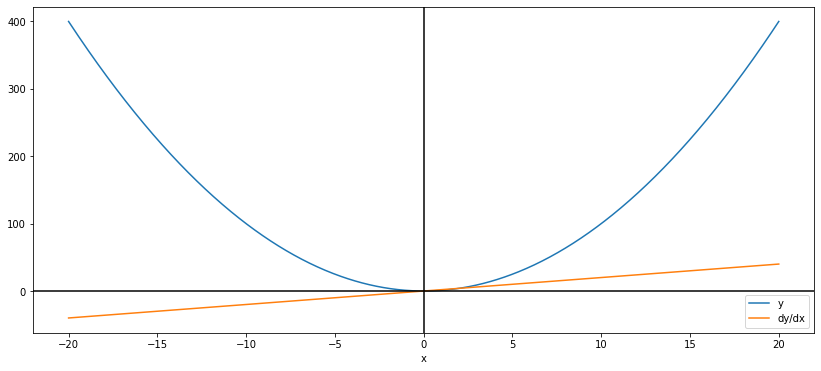

In [23]:
plt.figure(figsize=(14, 6))
x = tf.linspace(-20.0, 20.0, 1000)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = x**2

dy_dx = tape.gradient(y, x)


plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.legend()
_ = plt.xlabel('x')

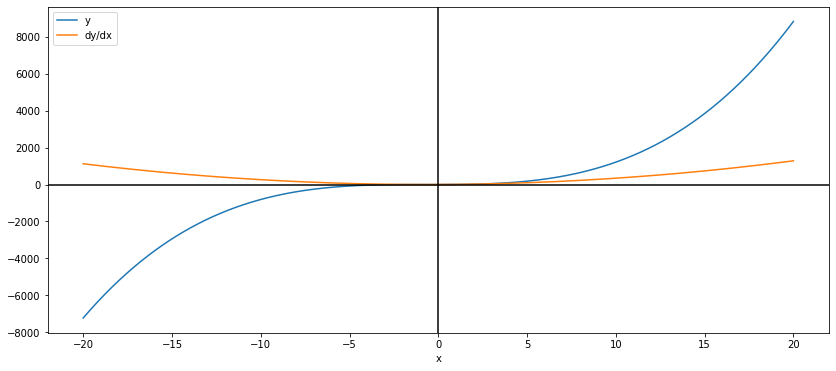

In [24]:
plt.figure(figsize=(14, 6))
x = tf.linspace(-20.0, 20.0, 1000)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = x**3 + (2 * x**2) + x

dy_dx = tape.gradient(y, x)


plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.legend()
_ = plt.xlabel('x')

# 2. Develop a skeleton for a neural learning application in Keras and PyTorch.

### a) Keras template

Epoch 1/5
391/391 [==============================] - 8s 4ms/step - loss: 2.1527 - accuracy: 0.2338

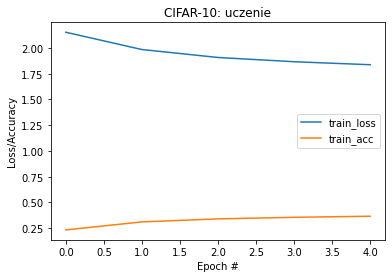

In [25]:
class KerasTemplate:
    """A simple keras deep learning template with sequential API"""

    def __init__(self, epochs: int, batch: int, lr0: float):
        self.epochs = epochs
        self.batch = batch
        self.lr0 = lr0
        self.trainX = []
        self.trainY = []
        self.testX = []
        self.testY = []
        self.classes = 0
        self.model = None
        self.h = None
        self.predictions = []

    def load_data(self, train_x: np.ndarray, train_y: np.ndarray, test_x: np.ndarray, test_y: np.ndarray) -> None:
        lb = LabelBinarizer()
        self.trainY = lb.fit_transform(train_y)
        self.testY = lb.transform(test_y)
        self.trainX = train_x.astype("float32") /255.0
        self.testX = test_x.astype("float32") /255.0
        self.create_model()

    def create_model(self) -> None:
        self.shapeI = self.trainX.shape[1:4]
        self.classes = self.trainY.shape[1]  #ile_klas
        #feature extraction
        self.model=Sequential()
        self.model.add(Input(shape=self.shapeI))
        self.model.add(Conv2D(32, (3,3), padding="same"))
        self.model.add(Activation('relu'))

        #klasyfikator
        self.model.add(Flatten())
        self.model.add(Dense(self.classes))
        self.model.add(Activation('softmax'))  #sigmoid dla dwóch klas
        self.compile()

    def compile(self) -> None:
        opt=SGD(momentum=0.4, learning_rate=self.lr0)
        self.model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    def fit(self) -> None:
        self.h = self.model.fit(self.trainX, self.trainY, batch_size=self.batch, epochs=self.epochs)

    def evaluate(self):
        loss, accuracy = self.model.evaluate(self.testX, self.testY)
        return loss, accuracy

    def predict(self):
        self.predictions = self.model.predict(self.testX)
        return self.predictions

    def print_report(self) -> None:
        n = np.arange(0, self.epochs)
        title="CIFAR-10: uczenie"
        plt.figure()
        plt.plot(n, self.h.history["loss"], label="train_loss")
        plt.plot(n, self.h.history["accuracy"], label="train_acc")
        plt.title(title)
        plt.xlabel("Epoch #")
        plt.ylabel("Loss/Accuracy")
        plt.legend()
        plt.show()
epochS=5
batch=128
lr0=1e-3
(trainX, trainY), (testX, testY)= cifar10.load_data()

kerasTemplate = KerasTemplate(epochS, batch, lr0)
kerasTemplate.load_data(trainX, trainY, testX, testY)
kerasTemplate.fit()
print(kerasTemplate.predict())
kerasTemplate.print_report()

# 3. Perceptron - simplified learning method
### Please model the above problem of binary classification with your own code.
Data (two features):
- from the given example
- generate randomly "more or less" linearly separable areas (use all data for learning)

Initial weights:
- set arbitrarily
- randomly generated

Hyperparameters:
- maximum number of epochs
- eta (= learning rate)

Visualization of data and decision hyperplane after each epoch.

Epoch 1


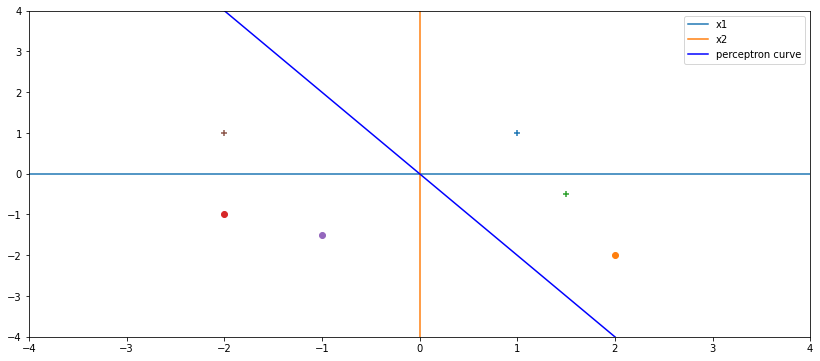

Epoch 2


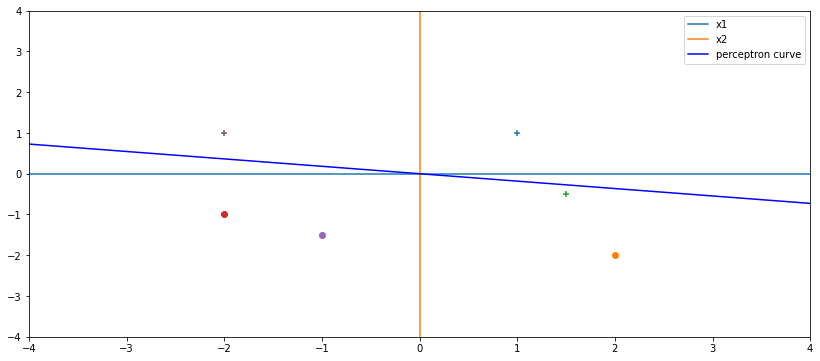

Epoch 3


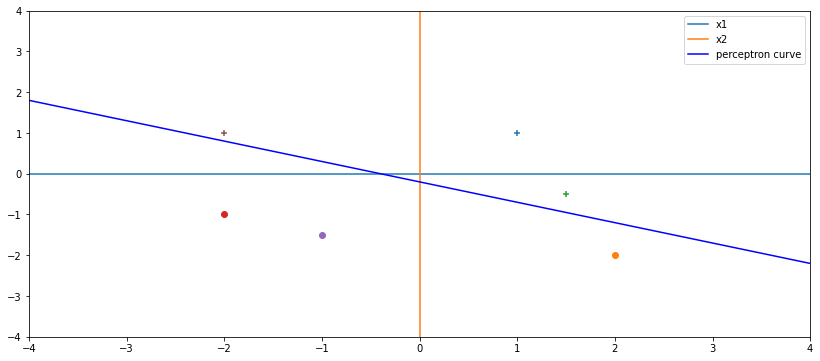

In [6]:
given_data = tf.constant([[1.0, 1.0], [2.0, -2.0], [1.5, -0.5], [-2.0, -1.0], [-1.0, -1.5], [-2.0, 1.0]])
given_result = np.array(['+', 'o', '+', 'o', 'o', '+'])
fixed_wages = tf.constant([0.0, 1.0, 0.5])
epochs = 5
lr0 = 0.0

class SimplePerceptron:
    """A simple perceptron"""
    def __init__(self, epochs: int, lr0: float, wages: tf.constant, sigma: float = 0.2, bias: float = 0.0):
        self.epochs = epochs
        self.lr0 = lr0
        self.data = []
        self.results = []
        self.wages = wages
        self.sigma = sigma

    def fit(self, data: tf.Tensor, results: tf.Tensor) -> None:
        self.data = data
        self.results = results
        self.learn()

    def learn(self) -> None:
        for epoch in range(1, self.epochs + 1):
            print("Epoch %1d" % epoch)
            to_next_epoch = False
            index = 0
            self.print_info()
            for x1, x2 in self.data:
                x = tf.constant([1.0, x1.numpy(), x2.numpy()])
                calc_result = self.evaluate(self.wages, x)
                if self.verify_classification(calc_result, self.results[index]) == 0:
                    to_next_epoch = True
                    self.modify_wages(x, self.calc_class_value(self.results[index]))
                index = index + 1
            if to_next_epoch is False:
                break

    def verify_classification(self, calc_result: float, real_result: str) -> int:
        return 1 if (real_result == '+' and calc_result >= 0) or (real_result == 'o' and calc_result < 0) else 0

    def modify_wages(self, x: tf.constant, classification_value: float) -> None:
        new_wages = []
        for i in range(0, self.wages.numpy().size):
            new_wages.append(self.modify_wage(self.wages[i].numpy(), x[i].numpy(), classification_value))
        self.wages = tf.convert_to_tensor(new_wages, dtype=tf.float32)


    def modify_wage(self, wi: float, xi: float, classification_value: float) -> float:
        return wi + (self.sigma * classification_value * xi)

    def calc_class_value(self, class_result: str) -> float:
        return 1.0 if class_result == '+' else -1.0

    def evaluate(self, a: tf.constant, b: tf.constant) -> float:
        a = a.numpy()
        b = b.numpy()
        sum = 0
        for i in range(0, a.size):
            sum += a[i] * b[i]
        return sum

    def print_info(self):
        plt.figure(figsize=(14, 6))
        plt.plot(range(-6,6,1), np.zeros(12), label='x1')
        plt.plot(np.zeros(9), range(-4,5,1), label='x2')
        results = []
        for i in range(-5,6,1):
            results.append(self.perceptron_curve(i))
        plt.plot(range(-5,6,1), results, color='blue', label='perceptron curve')
        index = 0
        for x1, x2 in self.data:
            plt.scatter(x1, x2, marker=self.results[index])
            index = index + 1
        plt.xlim(-4, 4)
        plt.ylim(-4, 4)
        plt.legend()
        plt.show()
        return None

    def perceptron_curve(self, x) -> float:
        return (-1.0 * (self.wages[1].numpy() / self.wages[2].numpy()) * x) - (self.wages[0].numpy() / self.wages[2].numpy())

simple_perceptron = SimplePerceptron(epochs=5, lr0=0.0, wages=fixed_wages)
simple_perceptron.fit(given_data, given_result)

# 4.Eksperyment: zamodelować w Keras pojedynczy perceptron Dense(1, …).
Jako funkcji aktywacji użyć "hard_sigmoid", która "uda" próg perceptronu (odcięcia typu twardy próg
nie da się użyć, bo musi być uczenie, do którego jest konieczna różniczkowalna funkcja aktywacji).

Dane (dwie cechy):
1) z podanego przykładu,
2) generować losowo "mniej więcej" liniowo separowalne obszary (wszystkie dane użyć do uczenia).

Sposób ustalenia wag początkowych (parametr warstwy: kernel_initializer): losowy, domyślny dla
warstwy.
Hiperparametr: maksymalna liczba epok.
Diagnostyka uczenia – jak na zajęciach.

# 5.Dla wybranego przez siebie zbioru danych proszę znaleźć dobry model neuronalny (w zależności od
danych: klasyfikacja binarna/wieloklasowa, regresja). Sieć: płytka złożona z warstw Dense(). Proszę
dobrać hiperparametry (liczbę warstw ukrytych, liczbę neuronów na każdej warstwie, aktywacje) oraz
optymalizator, funkcję straty i metrykę(i).